In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state

%matplotlib inline


#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(12)
n_samples = 1000
X = np.concatenate((np.random.normal(0, 1, int(0.3 * n_samples)),
                    np.random.normal(5, 1, int(0.7 * n_samples))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

print(X.shape)

(1000, 1)


In [114]:
def generate_data(num_points=1000, noise=0.2, random_state=None):

    generator = check_random_state(random_state)

    data_auxilary = generator.randn(1, num_points)

    data = np.cos(data_auxilary)
    data = np.vstack((data, np.sinc(data_auxilary)))

    data = data + noise * generator.rand(2, num_points)
    data = np.dot(np.array([[0.5, 0.5], [-0.5, 0.5]]), data).T

    return data

def plot_hist(data, title):
    
    N = 100
    hist, bins = np.histogram(data, bins=N, range=(np.min(data), np.max(data)), density=True)
    width = (bins[1] - bins[0])
    dx=(bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2

    fig, ax = plt.subplots(figsize=(14, 8))
    scale = 0.8
    ax.bar(center, hist, align='center', width=scale * width, fc='#AAAAFF')

    ax.set_title(title)

    plt.show()
    
    return None

num_points = 1000
random_state = 123
data = generate_data(num_points, random_state=None)
print(data.shape)

(1000, 2)


In [115]:
x_feature = data[:, 0]

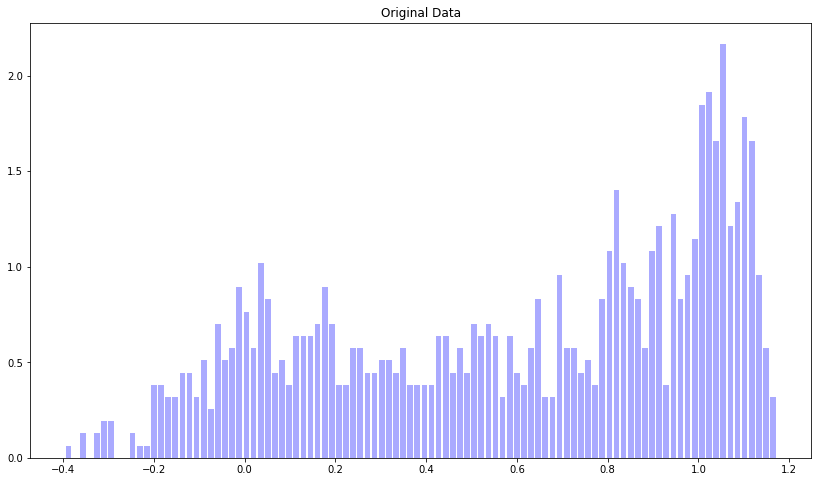

In [116]:
plot_hist(x_feature, 'Original Data')

In [132]:
kde = stats.kde.gaussian_kde(x_feature)

x_kde = kde(x_feature)
x_normal = stats.norm.pdf(x_feature)

print(x_feature.max(), x_feature.min())
print(x_normal.max(), x_normal.min())
print(x_kde.max(), x_kde.min())

1.17256989193 -0.395983639615
0.398942280337 0.200608785373
1.16989506987 0.0513966971786


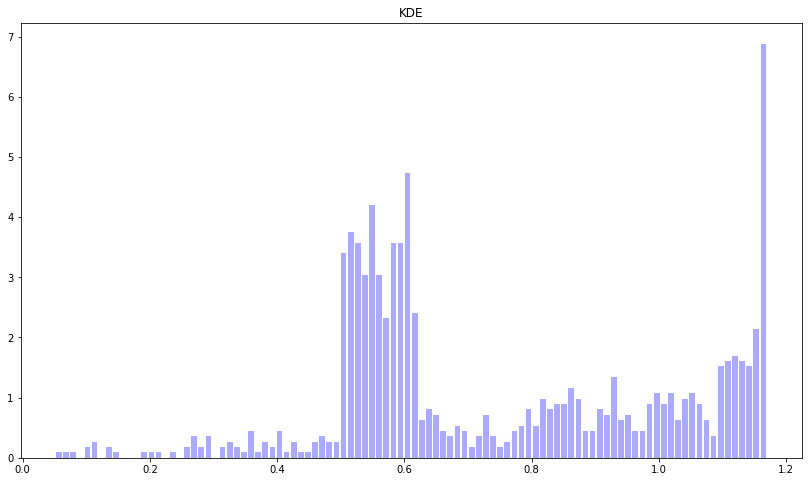

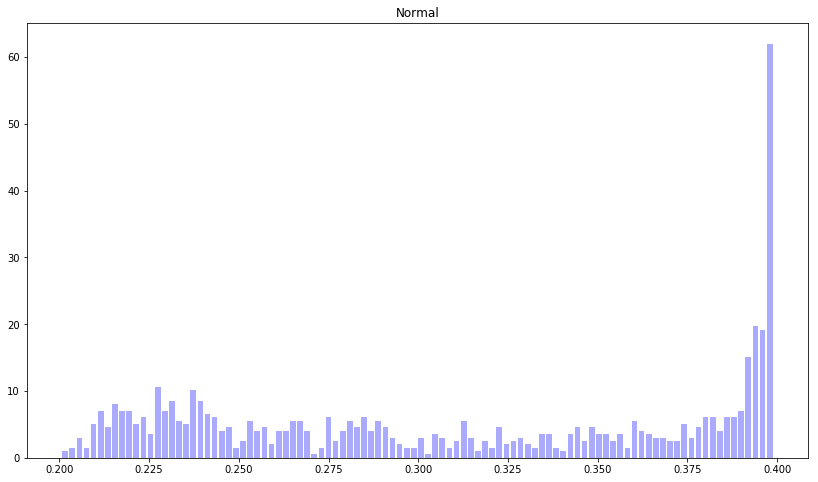

In [135]:
plot_hist(x_kde, 'KDE')
plot_hist(x_normal, 'Normal')

### Gaussianization

In [120]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

kde_cdf = np.vectorize(_kde_cdf)

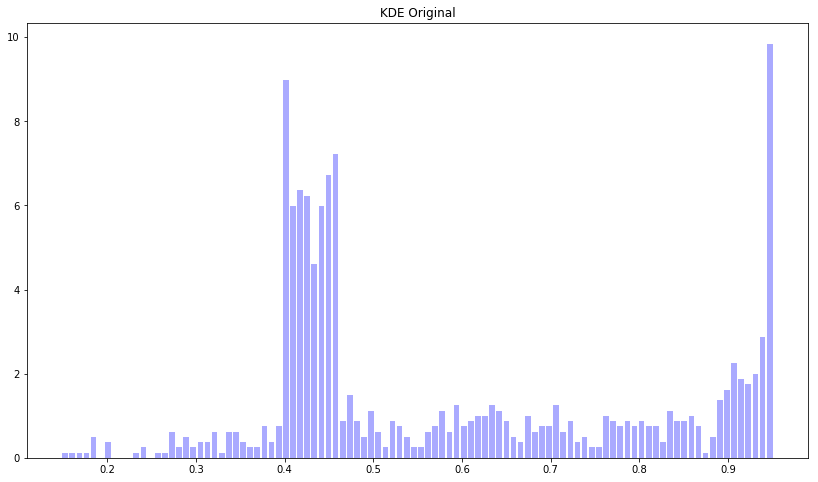

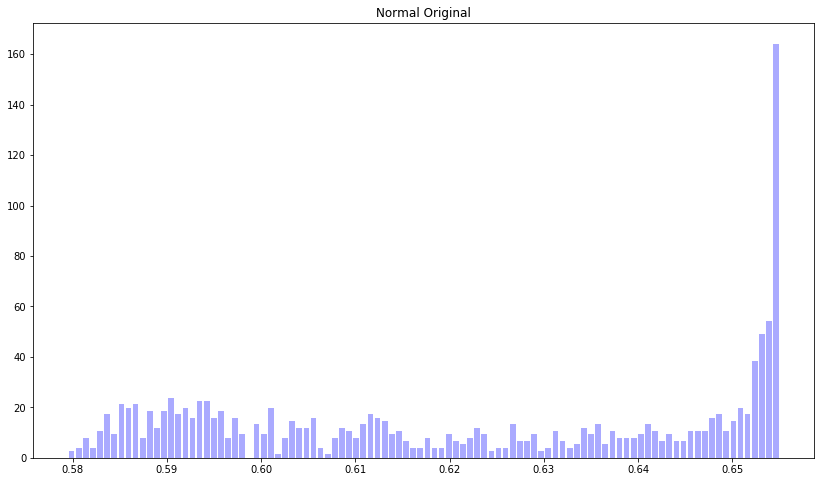

In [137]:
x_original = kde_cdf(x_kde)
x_original_norm = stats.norm.cdf(x_normal)
plot_hist(x_original, 'KDE Original')
plot_hist(x_original_norm, 'Normal Original')

In [64]:
from scipy import stats

In [65]:
normal_distribution = getattr(stats, 'norm')

In [67]:
x_normal = normal_distribution.pdf(X)

print(X.max(), X.min())
print(x_normal.max(), x_normal.min())

8.16655683256 -3.14741652154
0.398937036952 1.3145739385e-15


In [68]:
N = 100
hist, bins = np.histogram(x_normal, bins=N, range=(np.min(x_normal), np.max(x_normal)), density=True)
width = (bins[1] - bins[0])
dx=(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

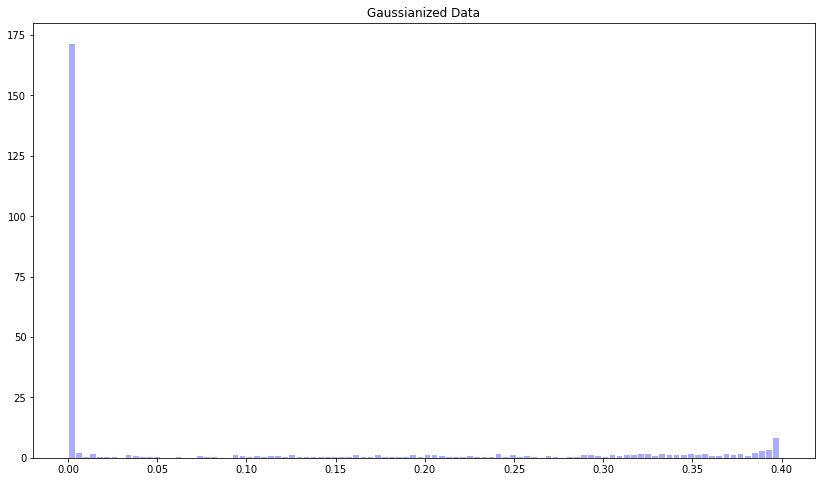

In [69]:
fig, ax = plt.subplots(figsize=(14, 8))
scale = 0.8
ax.bar(center, hist, align='center', width=scale * width, fc='#AAAAFF')
ax.set_title('Gaussianized Data')

plt.show()

### KDE Transformation

In [8]:
#normalized histogram of loaded datase
hist, bins = np.histogram(X, bins=100,range=(np.min(X),np.max(X)) ,density=True)
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

<Container object of 100 artists>

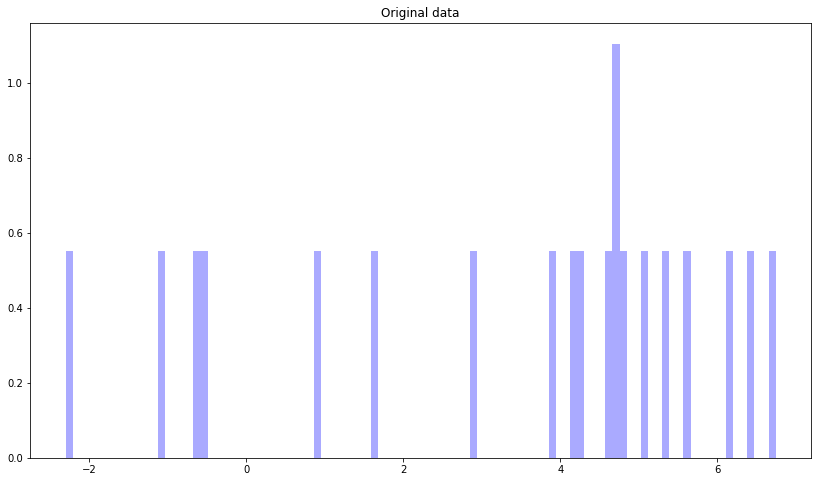